
WHAT: This notebook runs effect estimation using the CausalModule from CausalModule.py. It is meant to serve as a reference.

WHY: A straightforward script that compiles all the necessary steps to run effect estimation.

ASSUMES: Nothing; the entire pipeline is compiled for reference

FUTURE IMPROVEMENTS: Allowing for command line arguments to specify the necessary parameters

VARIABLES:
- data: Pandas DataFrame containing the dataset.

- discovery_algorithm: Causal discovery algorithm to discover the causal graph.

- treatment_variable: The variable to be treated.

- outcome_variable: The outcome variable to be measured.

- treatment_value: The value of the treatment variable for the treatment group.

- control_value: The value of the treatment variable for the control group.

WHO: S.K.S 2025/08/19

## Preliminaries

I would suggest that you first suppress warnings as it alleviates some really annoying and persistent library update messages.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Preparation

Next, for the data preparation -- I am using a synthetic dataset directly from DoWhy but you should change as needed.

Please do note the data types of the columns and also the general format.

* It is pretty important that there are no missing values
* Also, just as important, that all data is numeric
* Ensure that the column data types are correct; in the scenario where a variable is discrete ensure that the dtype is [int]

In [2]:
import dowhy.datasets
dataset = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_treatments=1,
        num_samples=10000,
        treatment_is_binary=True,
        outcome_is_binary=True,
        stddev_treatment_noise=10)
data = dataset['df']

print("setting the treatment and outcome variable dtypes to be of type integer...")
data['v0'] = data['v0'].astype(int) 
data['y'] = data['y'].astype(int)

print("====================================================================")

print(f"data dtypes:\n {data.dtypes}")

print("====================================================================")

print("data preview...")
print(data.head())
print()
print(f"treatment variable: {dataset['treatment_name']}")
print(f"outcome variable: {dataset['outcome_name']}")
print("====================================================================")
discovery_algorithm = "pc" 
treatment_variable = dataset['treatment_name'][0]
outcome_variable = dataset['outcome_name'][0]
treatment_value = 1
control_value = 0

/opt/anaconda3/envs/iocp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


setting the treatment and outcome variable dtypes to be of type integer...
data dtypes:
 Z0    float64
Z1    float64
W0    float64
W1    float64
W2    float64
W3    float64
W4    float64
v0      int64
y       int64
dtype: object
data preview...
    Z0        Z1        W0        W1        W2        W3        W4  v0  y
0  0.0  0.744181 -0.978462  0.695354  0.808075  0.345512  2.135094   1  1
1  0.0  0.044442 -0.914150 -0.293767  0.526123  1.501304 -0.021218   0  1
2  0.0  0.234661  0.773234 -0.269556 -0.290135  0.710612 -0.463679   0  0
3  0.0  0.984151 -1.687205  0.829002  0.690670  1.967674 -1.036918   1  1
4  0.0  0.035240  0.120505 -0.435666 -0.430934  0.994293 -1.632256   0  0

treatment variable: ['v0']
outcome variable: y


## Causal Pipeline for Classification

Remember that the current state of the module [08/19/25] covers two separate causal tasks -- effect estimation and classification using intereventional samples.

The below is for the former task of effect estimation.

We should begin by first creating an instance of the custom CausalModule class.

In [3]:
from CausalModule import CausalModule

causal_module = CausalModule(
    data=data,
    treatment_variable=treatment_variable,
    outcome_variable=outcome_variable,
)

2025-08-21 14:52:59,662 INFO: CausalModule initialized with provided parameters.


Next, let's discover a causal graph. If you already have a causal graph, you can alternatively use `input_causal_graph()` but for now let's assume that we are yet to discover the causal graph.

In [4]:
causal_module.find_causal_graph(algo=discovery_algorithm)

2025-08-21 14:52:59,668 INFO: Finding causal graph using pc algorithm
Depth=5, working on node 8: 100%|██████████| 9/9 [00:00<00:00, 2370.41it/s]


Now that we have discovered a causal graph, it might be a good idea to first see how the graph looks like.

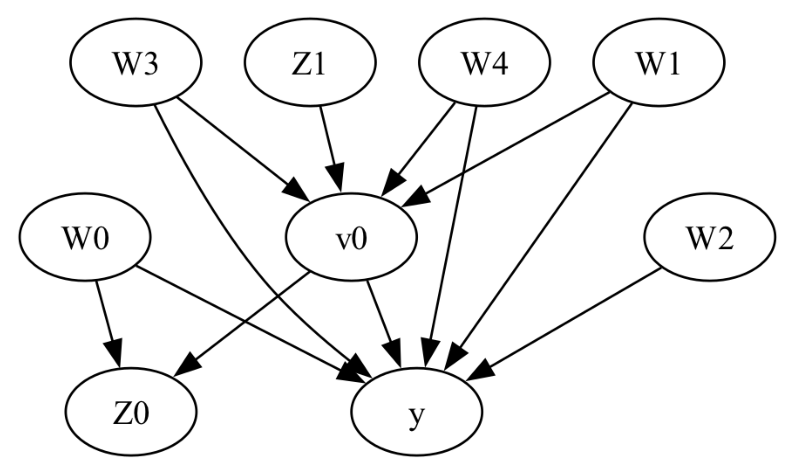

In [5]:
causal_module.see_graph()

It might also be a good idea to see the graph properties.

In [6]:
causal_module.see_graph_properties()

2025-08-21 14:53:00,914 INFO: ==========================================
2025-08-21 14:53:00,915 INFO: Number of nodes: 9
2025-08-21 14:53:00,916 INFO: ==========================================
2025-08-21 14:53:00,916 INFO: Number of edges: 12
2025-08-21 14:53:00,917 INFO: ==========================================
2025-08-21 14:53:00,917 INFO: Edge: Z1 -> v0, Weight: 1
2025-08-21 14:53:00,917 INFO: Edge: W0 -> Z0, Weight: 1
2025-08-21 14:53:00,918 INFO: Edge: W0 -> y, Weight: 1
2025-08-21 14:53:00,918 INFO: Edge: W1 -> v0, Weight: 1
2025-08-21 14:53:00,918 INFO: Edge: W1 -> y, Weight: 1
2025-08-21 14:53:00,919 INFO: Edge: W2 -> y, Weight: 1
2025-08-21 14:53:00,919 INFO: Edge: W3 -> v0, Weight: 1
2025-08-21 14:53:00,919 INFO: Edge: W3 -> y, Weight: 1
2025-08-21 14:53:00,919 INFO: Edge: W4 -> v0, Weight: 1
2025-08-21 14:53:00,920 INFO: Edge: W4 -> y, Weight: 1
2025-08-21 14:53:00,920 INFO: Edge: v0 -> Z0, Weight: 1
2025-08-21 14:53:00,920 INFO: Edge: v0 -> y, Weight: 1
2025-08-21 14:53

{'num_nodes': 9,
 'num_edges': 12,
 'edge_weights': {'Z1->v0': 1,
  'W0->Z0': 1,
  'W0->y': 1,
  'W1->v0': 1,
  'W1->y': 1,
  'W2->y': 1,
  'W3->v0': 1,
  'W3->y': 1,
  'W4->v0': 1,
  'W4->y': 1,
  'v0->Z0': 1,
  'v0->y': 1},
 'all_paths': [['v0', 'y']],
 'treatment_mb': ['Z0', 'Z1', 'W2', 'W0', 'W4', 'W3', 'W1', 'y'],
 'outcome_mb': ['W2', 'W0', 'W3', 'W1', 'v0', 'W4']}

It is crucial that we validate the graph and make changes if relations in the graph don't align with the statistical relations in the data.

For now I will just test with 10 permutations to preserve time and resources. Remember that you can utilize n_jobs to make this run faster if needed.

In [7]:
causal_module.refute_cgm(n_perm=10)

2025-08-21 14:53:00,928 INFO: Refuting the discovered/given causal graph
Test permutations of given graph: 100%|██████████| 10/10 [00:30<00:00,  3.01s/it]


We can take a look at what the graph refutation results look like.

In [8]:
causal_module.see_graph_refutation()

2025-08-21 14:53:39,940 INFO: Graph refutation metrics: TPA: 0/10 (p-value: 0.00), LMC: 8/43 (p-value: 0.00)


In the above graph refutation result the two fraction/p-values represent the following (respectively):

* Measure whether the LCMs implied by our graph satisfy the data. Compares the number of LCMs violated by our graph with the number of LCMs violated by a randomly permuted set of graphs.

* Check whether the graph is falsifiable. Assuming our graph is correct, how many other permuted graphs share the same number of LCM violations.


We might also want to see what the graph now looks like (since the function could have made modifications to the original graph if some relations hadn't matched with the data).

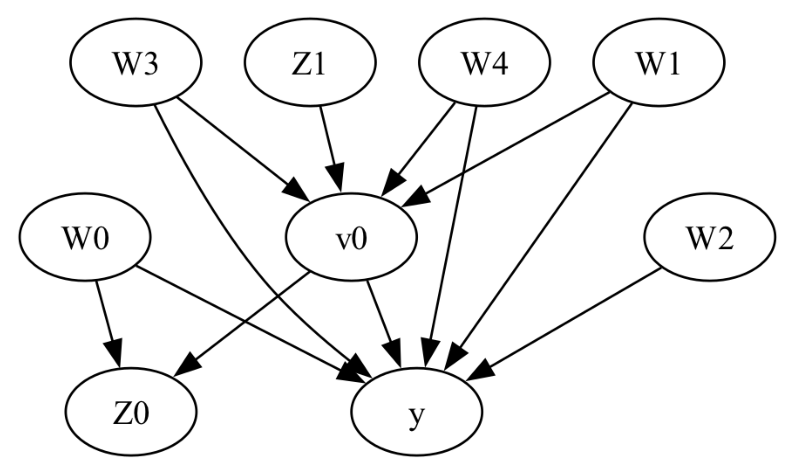

In [9]:
causal_module.see_graph()

Next, we should create a causal model that can be understood by DoWhy.

In [10]:
causal_module.create_model()

2025-08-21 14:53:40,176 INFO: Creating a causal model from the discovered/given causal graph
2025-08-21 14:53:40,178 INFO: Model to find the causal effect of treatment ['v0'] on outcome ['y']


## Saving the module instance

Now imagine we want to save the module instance to load it back in later, how can we do this?

We need to first import some utility functions from `utilities/utils.py`

In [11]:
from utilities.utils import save_instance_to_pickle, load_instance_from_pickle

In [12]:
save_instance_to_pickle(instance=causal_module, file_path='model/081925_5:30.pkl')

CausalModule instance saved to model/081925_5:30.pkl


## Loading module instance

Now let's load back in the module instance and continue with the classification task.

In [13]:
causal_module_loaded = load_instance_from_pickle(file_path='model/081925_5:30.pkl')

CausalModule instance loaded from model/081925_5:30.pkl


### Estimation

We need to first identify an estimand expression (a statistical expression that encodes the relationship between the treatment and outcome)

In [16]:
causal_module_loaded.identify_effect()

2025-08-21 14:54:20,224 INFO: Identifying the effect estimand of the treatment on the outcome variable
2025-08-21 14:54:20,228 INFO: Causal effect can be identified.
2025-08-21 14:54:20,229 INFO: Instrumental variables for treatment and outcome:['Z1']
2025-08-21 14:54:20,231 INFO: Frontdoor variables for treatment and outcome:[]
2025-08-21 14:54:20,231 INFO: Note that you can also use other methods for the identification process. Below are method descriptions taken directly from DoWhy's documentation
2025-08-21 14:54:20,232 INFO: maximal-adjustment: returns the maximal set that satisfies the backdoor criterion. This is usually the fastest way to find a valid backdoor set, but the set may contain many superfluous variables.
2025-08-21 14:54:20,232 INFO: minimal-adjustment: returns the set with minimal number of variables that satisfies the backdoor criterion. This may take longer to execute, and sometimes may not return any backdoor set within the maximum number of iterations.
2025-08-2

Next, we should actually use the identified estimand to estimate a causal effect between the treatment and outcome. Remember to set the control value and treatment value for the treatment variable in the parameters.

In [17]:
causal_module_loaded.estimate_effect(ctrl_val=control_value, trtm_val=treatment_value)

2025-08-21 14:54:20,238 INFO: Estimating the effect of the treatment on the outcome variable
2025-08-21 14:54:20,239 INFO: linear_regression
2025-08-21 14:54:20,240 INFO: INFO: Using Linear Regression Estimator
2025-08-21 14:54:20,242 INFO: b: y~v0+W3+W1+W4+v0*W2+v0*W0
2025-08-21 14:54:20,324 INFO: INFO: The sample size: 10000
2025-08-21 14:54:20,324 INFO: INFO: The number of simulations: 399
2025-08-21 14:54:20,328 INFO: b: y~v0+W3+W1+W4+v0*W2+v0*W0
2025-08-21 14:54:20,400 INFO: b: y~v0+W3+W1+W4+v0*W2+v0*W0
2025-08-21 14:54:20,476 INFO: b: y~v0+W3+W1+W4+v0*W2+v0*W0
2025-08-21 14:54:20,551 INFO: b: y~v0+W3+W1+W4+v0*W2+v0*W0
2025-08-21 14:54:20,625 INFO: b: y~v0+W3+W1+W4+v0*W2+v0*W0
2025-08-21 14:54:20,699 INFO: b: y~v0+W3+W1+W4+v0*W2+v0*W0
2025-08-21 14:54:20,770 INFO: b: y~v0+W3+W1+W4+v0*W2+v0*W0
2025-08-21 14:54:20,843 INFO: b: y~v0+W3+W1+W4+v0*W2+v0*W0
2025-08-21 14:54:20,915 INFO: b: y~v0+W3+W1+W4+v0*W2+v0*W0
2025-08-21 14:54:21,008 INFO: b: y~v0+W3+W1+W4+v0*W2+v0*W0
2025-08-21 14:

Similar to graphical refutation, it is always good practice to validate the resulting estimate using robustness tests as well.

In [18]:
causal_module_loaded.refute_estimate()

2025-08-21 14:54:49,910 INFO: Refuting the estimated effect of the treatment on the outcome variable
2025-08-21 14:54:49,912 INFO: Refutation over 100 simulated datasets of PlaceboType.PERMUTE treatment
2025-08-21 14:54:49,918 INFO: b: y~placebo+W3+W1+W4+placebo*W2+placebo*W0
2025-08-21 14:54:49,995 INFO: b: y~placebo+W3+W1+W4+placebo*W2+placebo*W0
2025-08-21 14:54:50,069 INFO: b: y~placebo+W3+W1+W4+placebo*W2+placebo*W0
2025-08-21 14:54:50,143 INFO: b: y~placebo+W3+W1+W4+placebo*W2+placebo*W0
2025-08-21 14:54:50,217 INFO: b: y~placebo+W3+W1+W4+placebo*W2+placebo*W0
2025-08-21 14:54:50,290 INFO: b: y~placebo+W3+W1+W4+placebo*W2+placebo*W0
2025-08-21 14:54:50,361 INFO: b: y~placebo+W3+W1+W4+placebo*W2+placebo*W0
2025-08-21 14:54:50,434 INFO: b: y~placebo+W3+W1+W4+placebo*W2+placebo*W0
2025-08-21 14:54:50,507 INFO: b: y~placebo+W3+W1+W4+placebo*W2+placebo*W0
2025-08-21 14:54:50,580 INFO: b: y~placebo+W3+W1+W4+placebo*W2+placebo*W0
2025-08-21 14:54:50,651 INFO: b: y~placebo+W3+W1+W4+place

All **RELEVANT** metrics are first stored in the instance itself and can be retrieved like this.

In [19]:
causal_module_loaded.store_results()

2025-08-21 14:55:11,959 INFO: ==========================================
2025-08-21 14:55:11,959 INFO: Number of nodes: 9
2025-08-21 14:55:11,960 INFO: ==========================================
2025-08-21 14:55:11,960 INFO: Number of edges: 12
2025-08-21 14:55:11,960 INFO: ==========================================
2025-08-21 14:55:11,961 INFO: Edge: Z1 -> v0, Weight: 1
2025-08-21 14:55:11,961 INFO: Edge: W0 -> Z0, Weight: 1
2025-08-21 14:55:11,962 INFO: Edge: W0 -> y, Weight: 1
2025-08-21 14:55:11,962 INFO: Edge: W1 -> v0, Weight: 1
2025-08-21 14:55:11,963 INFO: Edge: W1 -> y, Weight: 1
2025-08-21 14:55:11,963 INFO: Edge: W2 -> y, Weight: 1
2025-08-21 14:55:11,964 INFO: Edge: W3 -> v0, Weight: 1
2025-08-21 14:55:11,964 INFO: Edge: W3 -> y, Weight: 1
2025-08-21 14:55:11,964 INFO: Edge: W4 -> v0, Weight: 1
2025-08-21 14:55:11,965 INFO: Edge: W4 -> y, Weight: 1
2025-08-21 14:55:11,966 INFO: Edge: v0 -> Z0, Weight: 1
2025-08-21 14:55:11,967 INFO: Edge: v0 -> y, Weight: 1
2025-08-21 14:55

Note the warnings in the logger in the above output -- these should help navigate missing results. In our case we did not perform classification and so those results are not stored.

In [20]:
causal_module_loaded.results.keys()

dict_keys(['graph_properties', 'graph_refutation', 'node_quality_score', 'graph_quality_score', 'graph_quality_summary', 'effect_estimate', 'estimate_refutation'])

In [21]:
print(causal_module_loaded.results['graph_quality_score'])

[[14  2]
 [ 4 16]]
